In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [58]:
data = pd.read_csv('CustomerChurnData.csv')

In [59]:
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11,1,5.0,160.0,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15,0,0.0,121.0,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14,0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23,0,3.0,134.0,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11,1,3.0,130.0,Mobile


In [60]:
print("The shape of the data is:", data.shape)
print("\n")
print("The information of the data is:", data.info())
print("\n")
print("The columns of the data is:", data.columns)
print("\n")
print("The statistical analysis of the dataset:", data.describe())

The shape of the data is: (11260, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  float64
 13  Complain_ly              10903 non-n

In [61]:
print("The null values present in each column: ")
dataNa = data.isnull().sum()
dataNa[dataNa.values > 0].sort_values(ascending=False)

The null values present in each column: 


cashback                471
Complain_ly             357
Day_Since_CC_connect    357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
City_Tier               112
Account_user_count      112
Payment                 109
Gender                  108
Tenure                  102
CC_Contacted_LY         102
rev_per_month           102
Service_Score            98
account_segment          97
dtype: int64

# Handling Null Values

In [62]:
data.replace('*', np.nan, inplace=True)

In [63]:
data.dropna(inplace=True)
data.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

# Label Encoding

In [64]:
label_encoder = LabelEncoder()
categorical_cols = ['City_Tier', 'Payment', 'Gender', 'Marital_Status', 'Login_device', 'account_segment']
for col in categorical_cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Training and Testing

In [65]:
X = data.drop(['AccountID', 'Churn', 'Marital_Status'], axis=1)
y = data['Churn']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X_train

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1335,2.0,0,34.0,1,0,3.0,4.0,2,5.0,2.0,0.0,14,0,4.0,138.0,1
5166,13.0,0,35.0,2,1,4.0,5.0,3,5.0,5.0,0.0,21,1,4.0,168.0,0
10945,13.0,0,17.0,1,1,4.0,5.0,3,3.0,5.0,0.0,18,1,8.0,163.0,1
4965,19.0,2,16.0,2,0,4.0,5.0,3,3.0,3.0,0.0,14,5,13.0,181.0,0
8729,16.0,0,42.0,2,0,4.0,4.0,3,3.0,6.0,0.0,12,2,3.0,174.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,13.0,0,15.0,2,0,3.0,3.0,4,3.0,10.0,0.0,16,4,13.0,232.0,1
6719,17.0,0,15.0,2,0,3.0,1.0,0,1.0,3.0,1.0,21,6,7.0,183.0,1
6979,0.0,0,14.0,1,1,2.0,3.0,2,4.0,12.0,0.0,13,1,2.0,142.0,1
1101,5.0,0,16.0,2,1,2.0,3.0,2,3.0,7.0,0.0,13,0,3.0,134.0,0


In [68]:
X_test

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
3917,5.0,0,9.0,2,1,4.0,4.0,2,3.0,3.0,0.0,15,1,4.0,160.0,1
2793,14.0,2,9.0,2,1,2.0,4.0,3,4.0,3.0,0.0,11,1,4.0,189.0,1
7232,13.0,0,12.0,1,1,2.0,3.0,1,3.0,1.0,0.0,19,3,9.0,298.0,1
1702,0.0,2,6.0,0,0,3.0,0.0,2,4.0,0.0,1.0,11,1,2.0,122.0,2
7128,18.0,0,21.0,2,1,2.0,3.0,3,4.0,13.0,0.0,20,1,15.0,130.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3.0,0,7.0,2,1,4.0,6.0,2,2.0,3.0,0.0,19,3,9.0,152.0,0
7464,99.0,0,19.0,4,1,2.0,4.0,4,1.0,7.0,1.0,16,1,0.0,273.0,1
4296,15.0,0,15.0,2,1,3.0,6.0,0,1.0,4.0,0.0,16,2,4.0,232.0,0
7080,30.0,1,12.0,4,0,2.0,4.0,1,1.0,13.0,0.0,23,0,2.0,290.0,0


In [69]:
y_train

1335     0
5166     1
10945    0
4965     0
8729     0
        ..
7423     0
6719     0
6979     0
1101     0
9425     0
Name: Churn, Length: 6092, dtype: int64

In [70]:
y_test

3917     0
2793     0
7232     0
1702     1
7128     0
        ..
3209     0
7464     0
4296     1
7080     0
10252    0
Name: Churn, Length: 2612, dtype: int64

# Feature Scaling

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model Training

In [72]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

# Decision Tree Model Training

In [73]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

# Random Forest Model Training

In [74]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

# XG Boost Model Training

In [75]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

## Logistic Regression

In [76]:
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 86.3323124042879
Confusion Matrix:
[[2093   63]
 [ 294  162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2156
           1       0.72      0.36      0.48       456

    accuracy                           0.86      2612
   macro avg       0.80      0.66      0.70      2612
weighted avg       0.85      0.86      0.84      2612



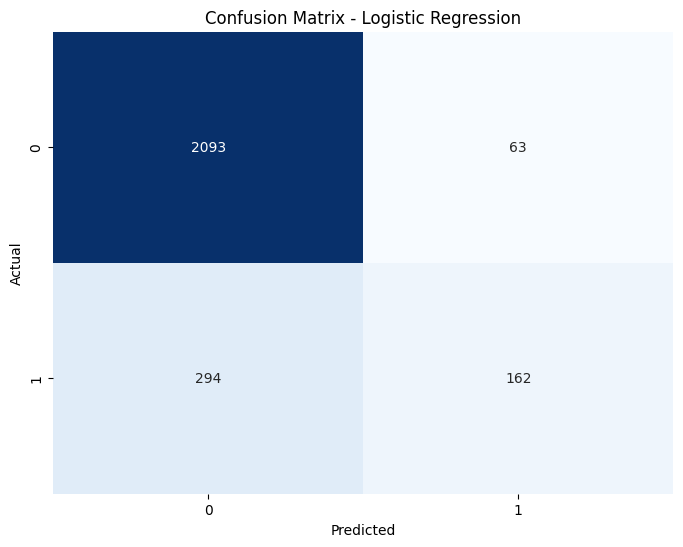

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2156
           1       0.72      0.36      0.48       456

    accuracy                           0.86      2612
   macro avg       0.80      0.66      0.70      2612
weighted avg       0.85      0.86      0.84      2612



In [77]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Decision Tree

In [78]:
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 94.02756508422665
Confusion Matrix:
[[2077   79]
 [  77  379]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2156
           1       0.83      0.83      0.83       456

    accuracy                           0.94      2612
   macro avg       0.90      0.90      0.90      2612
weighted avg       0.94      0.94      0.94      2612



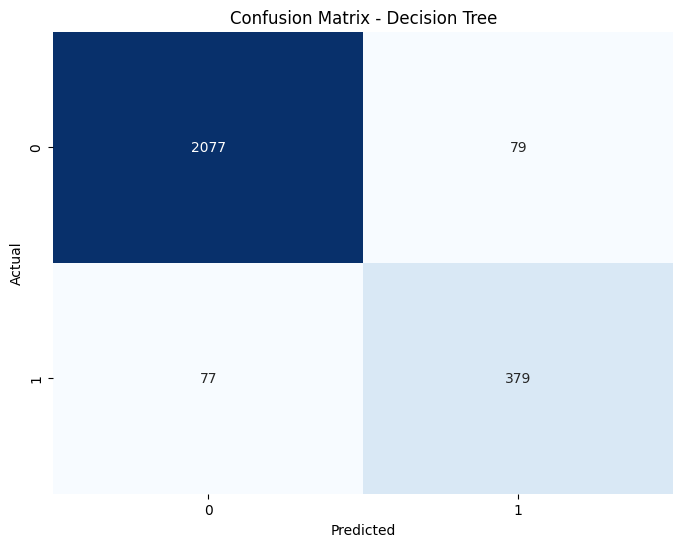

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2156
           1       0.83      0.83      0.83       456

    accuracy                           0.94      2612
   macro avg       0.90      0.90      0.90      2612
weighted avg       0.94      0.94      0.94      2612



In [79]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest

In [80]:
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf*100,'%')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 96.09494640122512 %
Confusion Matrix:
[[2122   34]
 [  68  388]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2156
           1       0.92      0.85      0.88       456

    accuracy                           0.96      2612
   macro avg       0.94      0.92      0.93      2612
weighted avg       0.96      0.96      0.96      2612



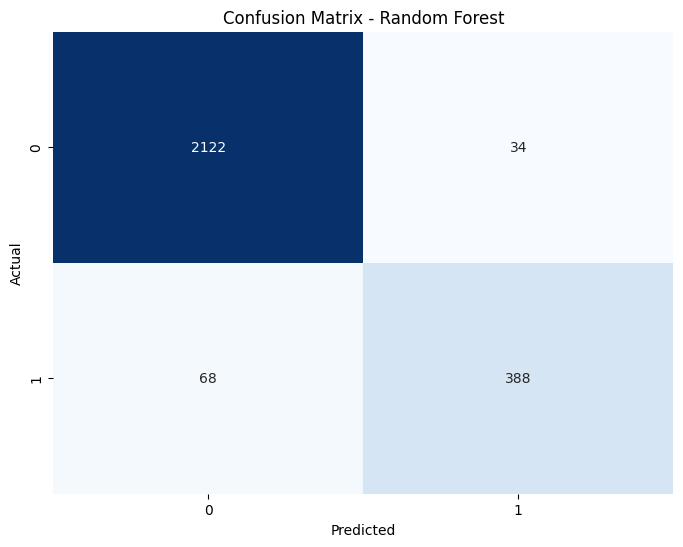

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2156
           1       0.92      0.85      0.88       456

    accuracy                           0.96      2612
   macro avg       0.94      0.92      0.93      2612
weighted avg       0.96      0.96      0.96      2612



In [81]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XG Boost 

In [82]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb*100)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1-score:", f1_xgb)
print("XGBoost ROC-AUC score:", roc_auc_xgb)
print("XGBoost Confusion matrix:")
print(conf_matrix_xgb)
print("XGBoost Classification report:")
print(class_report_xgb)

XGBoost Accuracy: 96.09494640122512
XGBoost Precision: 0.9097222222222222
XGBoost Recall: 0.8618421052631579
XGBoost F1-score: 0.8851351351351351
XGBoost ROC-AUC score: 0.989766420922436
XGBoost Confusion matrix:
[[2117   39]
 [  63  393]]
XGBoost Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2156
           1       0.91      0.86      0.89       456

    accuracy                           0.96      2612
   macro avg       0.94      0.92      0.93      2612
weighted avg       0.96      0.96      0.96      2612



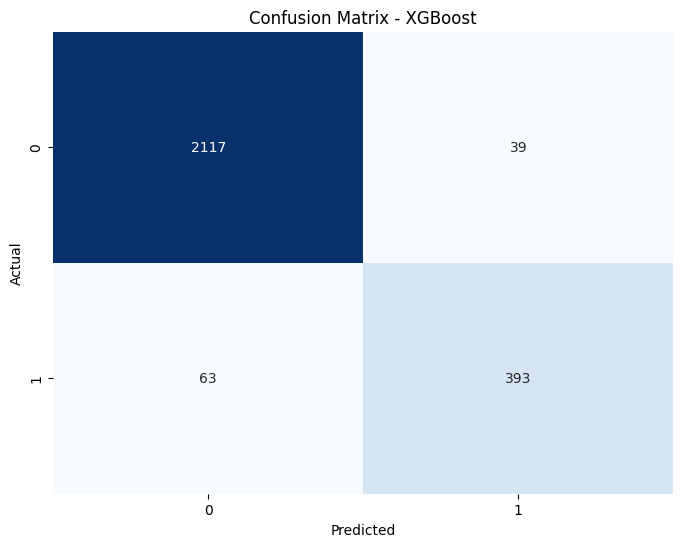

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2156
           1       0.91      0.86      0.89       456

    accuracy                           0.96      2612
   macro avg       0.94      0.92      0.93      2612
weighted avg       0.96      0.96      0.96      2612



In [83]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Neural Network Model

In [84]:
model_nn = Sequential()
model_nn.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

In [85]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
epochs = 50
history = model_nn.fit(X_train_scaled, y_train, epochs=epochs, validation_data=(X_test_scaled, y_test))

Epoch 1/50
191/191 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8139 - val_loss: 0.3786 - val_accuracy: 0.8442
Epoch 2/50
191/191 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8654 - val_loss: 0.3427 - val_accuracy: 0.8572
Epoch 3/50
191/191 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8826 - val_loss: 0.3145 - val_accuracy: 0.8702
Epoch 4/50
191/191 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8959 - val_loss: 0.2874 - val_accuracy: 0.8855
Epoch 5/50
191/191 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.9087 - val_loss: 0.2738 - val_accuracy: 0.8848
Epoch 6/50
191/191 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9123 - val_loss: 0.2721 - val_accuracy: 0.8851
Epoch 7/50
191/191 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9176 - val_loss: 0.2638 - val_accuracy: 0.8955
Epoch 

In [87]:
loss_nn, accuracy_nn = model_nn.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss_nn)
print("Test Accuracy:", accuracy_nn)

82/82 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9632
Test Loss: 0.13540512323379517
Test Accuracy: 0.9632465839385986


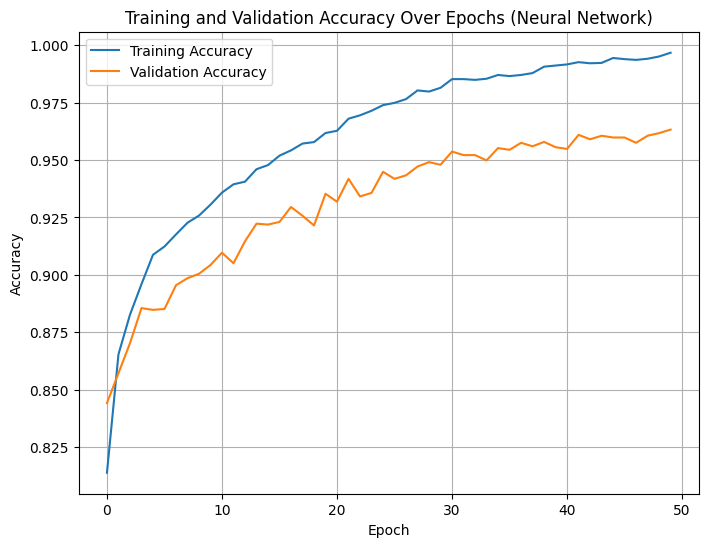

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

# Model Tuning

## Random Forest

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10]  
}

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9535466767963727


## Logistic Regression

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search over
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']  
}

# Initialize the classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Initialize the GridSearchCV object
grid_search_logreg = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid_logreg, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search_logreg.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Logistic Regression - Best Parameters:", grid_search_logreg.best_params_)
print("Logistic Regression - Best Score:", grid_search_logreg.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression - Best Parameters: {'C': 100, 'penalty': 'l2'}
Logistic Regression - Best Score: 0.8783644565857234


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^

## Decision Tree

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search over
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search_dt.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Decision Tree - Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree - Best Score:", grid_search_dt.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Best Score: 0.9295807621795571


## XGBoost

In [92]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7],  
    'min_child_weight': [1, 3, 5],  
}

# Initialize the classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("XGBoost - Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost - Best Score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost - Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1}
XGBoost - Best Score: 0.955844719149859


In [93]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [94]:
def model_builder(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='kt_dir',
                     project_name='kt_hyperband')

# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Execute the search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model.
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Evaluate the best model.
y_pred_best_model = best_model.predict(X_test_scaled)
accuracy_best_model = accuracy_score(y_test, (y_pred_best_model > 0.5).astype(int))
print(f"Best Model Accuracy: {accuracy_best_model}")

Reloading Tuner from kt_dir\kt_hyperband\tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 384 and the optimal learning rate for the optimizer
is 0.01.

82/82 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.9123
Test Loss: 0.24068531394004822
Test Accuracy: 0.9123277068138123
82/82 [==============================] - 0s 756us/step
Best Model Accuracy: 0.9123277182235835


# Accuracies

In [95]:
accuracies = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Accuracy': [
        f"{accuracy_logreg * 100:.2f}%",
        f"{accuracy_dt * 100:.2f}%",
        f"{accuracy_rf * 100:.2f}%",
        f"{accuracy_xgb * 100:.2f}%",
        f"{accuracy_nn * 100:.2f}%"
    ]
}

accuracy_df = pd.DataFrame(accuracies)

print(accuracy_df)

                 Model Accuracy
0  Logistic Regression   86.33%
1        Decision Tree   94.03%
2        Random Forest   96.09%
3              XGBoost   96.09%
4       Neural Network   96.32%


In [96]:
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

print(accuracy_df_sorted)

best_model = accuracy_df_sorted.iloc[0]['Model']
best_accuracy = accuracy_df_sorted.iloc[0]['Accuracy']
print(f"The best model is {best_model} with an accuracy of {best_accuracy}.")

                 Model Accuracy
4       Neural Network   96.32%
2        Random Forest   96.09%
3              XGBoost   96.09%
1        Decision Tree   94.03%
0  Logistic Regression   86.33%
The best model is Neural Network with an accuracy of 96.32%.


# Prediction via User Input

In [97]:
# Define input values from the user
user_input = {
    'Tenure': 5,
    'City_Tier': 0,
    'CC_Contacted_LY': 9,
    'Payment': 2, 
    'Gender': 1, 
    'Service_Score': 4,
    'Account_user_count': 4,
    'account_segment': 2,  
    'CC_Agent_Score': 3,
    'rev_per_month': 3,
    'Complain_ly': 0,
    'rev_growth_yoy': 15,
    'coupon_used_for_payment': 1,
    'Day_Since_CC_connect': 4,
    'cashback': 160,
    'Login_device': 1
}

# user_df = pd.DataFrame([[2.0, 0, 34.0, 1, 0, 3.0, 4.0, 2, 5.0, 2, 2.0, 0.0, 14, 0, 4.0, 138.0, 1]])
user_df = pd.DataFrame([user_input])
# Scale the input features
user_scaled = scaler.transform(user_df)

# Logistic Regression
user_pred_logreg = logreg_model.predict(user_scaled)

# Decision Tree
user_pred_dt = dt_model.predict(user_scaled)

# Random Forest
user_pred_rf = rf_model.predict(user_scaled)

# XGBoost
user_pred_xgb = xgb_model.predict(user_scaled)

# Neural Network
user_pred_nn = model_nn.predict(user_scaled)

# Print predictions for all models
if user_pred_logreg[0] == 1:
    print("\nLogistic Regression predicts the user to churn.")
else:
    print("Logistic Regression predicts the user not to churn.")

if user_pred_dt[0] == 1:
    print("Decision Tree predicts the user to churn.")
else:
    print("Decision Tree predicts the user not to churn.")

if user_pred_rf[0] == 1:
    print("Random Forest predicts the user to churn.")
else:
    print("Random Forest predicts the user not to churn.")

if user_pred_xgb[0] == 1:
    print("XGBoost predicts the user to churn.")
else:
    print("XGBoost predicts the user not to churn.")

if user_pred_nn[0] == 1:
    print("Neural Network predicts the user to churn.")
else:
    print("Neural Network predicts the user not to churn.")


1/1 [==============================] - 0s 90ms/step
Logistic Regression predicts the user not to churn.
Decision Tree predicts the user not to churn.
Random Forest predicts the user not to churn.
XGBoost predicts the user not to churn.
Neural Network predicts the user not to churn.


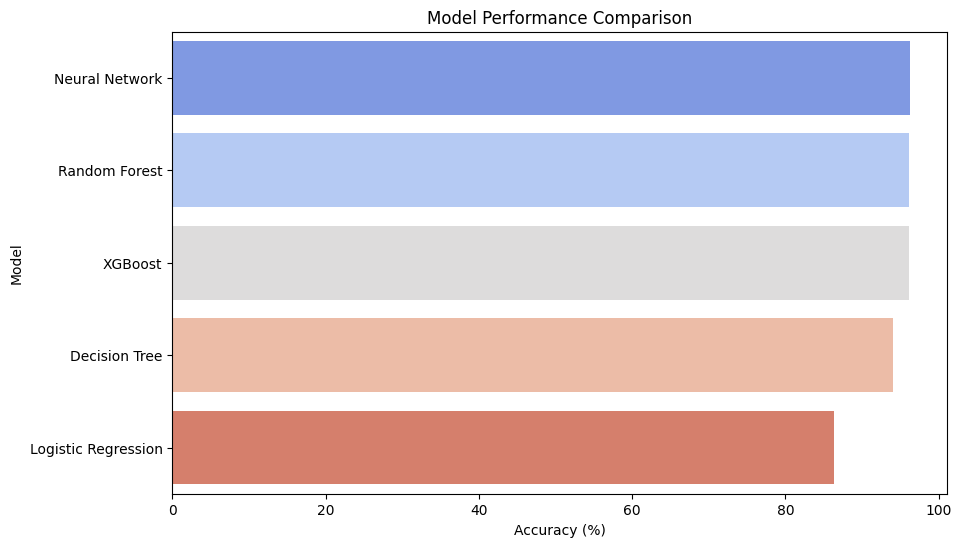

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert accuracies to float for plotting
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].str.rstrip('%').astype('float')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df.sort_values(by='Accuracy', ascending=False), palette='coolwarm')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()